In [99]:
import torch
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import torch.optim as optim


# Load the dataset
digits = load_digits()
X = digits.data
Y = digits.target

# Split the dataset into training and testing sets
X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.3, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_other, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train)
Y_test_tensor = torch.tensor(Y_other)

# One-hot encode the labels
num_classes = 10  # since MNIST digits go from 0 to 9
Y_train_one_hot = F.one_hot(Y_train_tensor, num_classes=num_classes)
Y_test_one_hot = F.one_hot(Y_test_tensor, num_classes=num_classes)

# Verify shapes of the tensors
print("Shapes of tensors:")
print("X_train_tensor:", X_train_tensor.shape)
print("X_test_tensor:", X_test_tensor.shape)
print("Y_train_one_hot:", Y_train_one_hot.shape)
print("Y_test_one_hot:", Y_test_one_hot.shape)


Shapes of tensors:
X_train_tensor: torch.Size([1257, 64])
X_test_tensor: torch.Size([540, 64])
Y_train_one_hot: torch.Size([1257, 10])
Y_test_one_hot: torch.Size([540, 10])


Epoch 1, Loss: 16.80026626586914
Epoch 2, Loss: 10.53603744506836
Epoch 3, Loss: 8.012605667114258
Epoch 4, Loss: 6.490810871124268
Epoch 5, Loss: 5.652271270751953
Epoch 6, Loss: 5.064896106719971
Epoch 7, Loss: 4.558541774749756
Epoch 8, Loss: 4.101886749267578
Epoch 9, Loss: 3.6918489933013916
Epoch 10, Loss: 3.325819492340088
Epoch 11, Loss: 3.001067638397217
Epoch 12, Loss: 2.7159202098846436
Epoch 13, Loss: 2.4697535037994385
Epoch 14, Loss: 2.2608513832092285
Epoch 15, Loss: 2.084994077682495
Epoch 16, Loss: 1.9365147352218628
Epoch 17, Loss: 1.8099483251571655
Epoch 18, Loss: 1.7008006572723389
Epoch 19, Loss: 1.605613112449646
Epoch 20, Loss: 1.5217691659927368
Epoch 21, Loss: 1.447277545928955
Epoch 22, Loss: 1.380598783493042
Epoch 23, Loss: 1.3205232620239258
Epoch 24, Loss: 1.2660852670669556
Epoch 25, Loss: 1.2165050506591797
Epoch 26, Loss: 1.171143889427185
Epoch 27, Loss: 1.12947416305542
Epoch 28, Loss: 1.0910543203353882
Epoch 29, Loss: 1.0555131435394287
Epoch 30, L

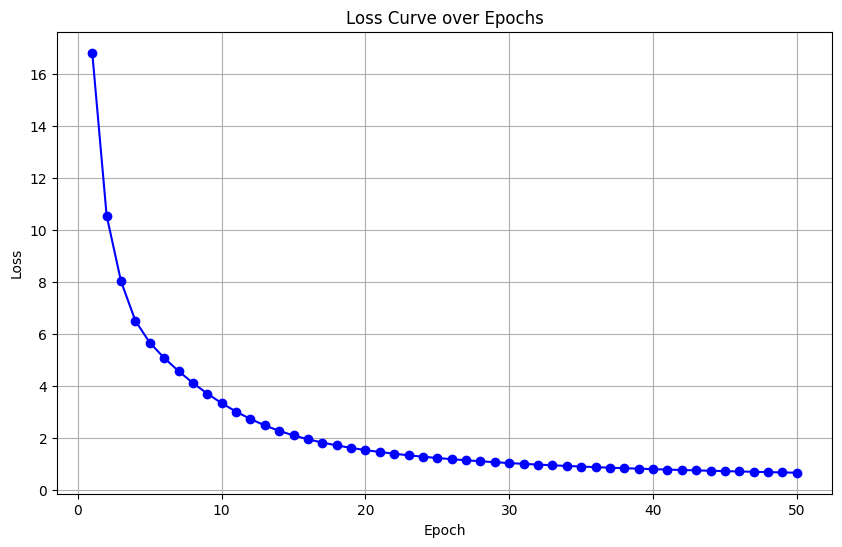

In [100]:


len_traindata = len(X_train_tensor)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64)

class SimpleClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleClassifier, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        torch.nn.init.xavier_uniform_(self.linear.weight)
        self.linear.bias.data.fill_(0.01)

    def forward(self, x):
        x = self.linear(x)
        return F.log_softmax(x, dim=1)

# Initializing model, criterion, and optimizer
model = SimpleClassifier(input_dim=64, output_dim=10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# List to hold the losses
losses = []

# Training loop
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())  # Save the loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

print("Model training is finalized!")

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), losses, marker='o', linestyle='-', color='b')
plt.title('Loss Curve over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()




In [101]:

model.eval()  # Set the model to evaluation mode
test_losses = []
with torch.no_grad():  # No need to track gradients for evaluation
    for i in range(len(X_test_tensor)):
        x = X_test_tensor[i].unsqueeze(0)
        y = Y_test_tensor[i].unsqueeze(0)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        test_losses.append(loss.item())

average_loss = sum(test_losses) / len(test_losses)
print(f'Average test loss: {average_loss}')



Average test loss: 0.5847091108562087
